In [1]:
# This is to develop the code the generate contrast curves
# in the lambda/B regime from the KS analysis done on the 
# ADI frames

# Created 2020 May 28 by E.S.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib qt

In [2]:
df = pd.read_csv("data/test_lambda_over_b_1.csv")

In [3]:
df.keys()

Index(['Unnamed: 0', 'dist_asec', 'comp_ampl',
       'D_xsec_strip_w_planets_rel_to_strip_0',
       'D_xsec_strip_w_planets_rel_to_strip_1',
       'D_xsec_strip_w_planets_rel_to_strip_2',
       'D_xsec_strip_w_planets_rel_to_strip_3',
       'D_xsec_strip_w_planets_rel_to_strip_4',
       'val_xsec_crit_strip_w_planets_rel_to_strip_0',
       'val_xsec_crit_strip_w_planets_rel_to_strip_1',
       'val_xsec_crit_strip_w_planets_rel_to_strip_2',
       'val_xsec_crit_strip_w_planets_rel_to_strip_3',
       'val_xsec_crit_strip_w_planets_rel_to_strip_4'],
      dtype='object')

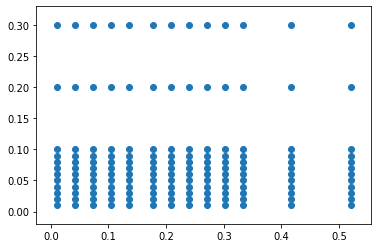

In [4]:
# print out a plot, so that the user can see level of completion 
# represented by the files available

plt.clf()
plt.scatter(df["dist_asec"],df["comp_ampl"])
plt.show()

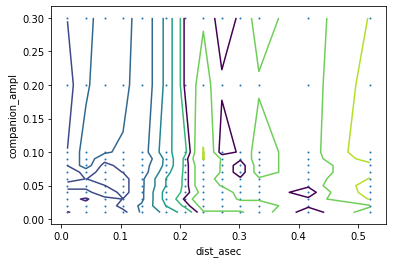

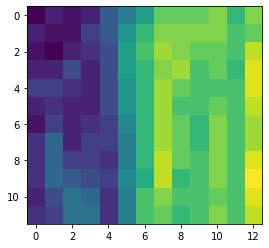

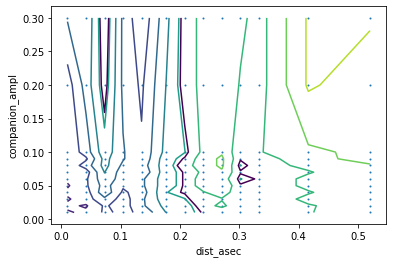

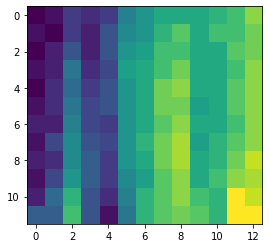

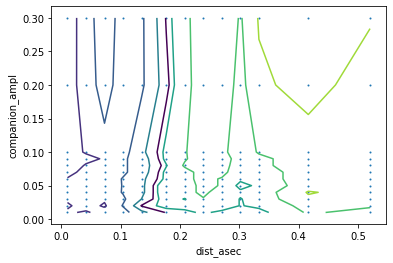

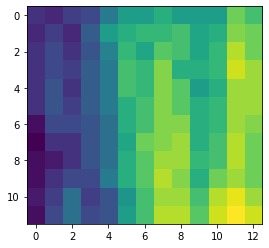

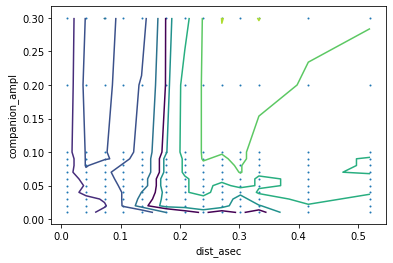

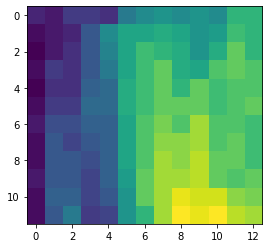

In [17]:
# make a new DataFrame from a subset of the data
# contour_data = df[["dist_asec","comp_ampl","D_xsec_strip_w_planets_rel_to_strip_1"]]
contour_data = df

# initialize cube to hold the KS statistic
cube_stat = np.zeros((4,len(contour_data["comp_ampl"].unique()),len(contour_data["dist_asec"].unique())))

for i in range(1,5):
    
    # which stripes are we comparing with?
    if (i==1):
        comparison_string = 'D_xsec_strip_w_planets_rel_to_strip_1'
    elif (i==2):
        comparison_string = 'D_xsec_strip_w_planets_rel_to_strip_2'
    elif (i==3):
        comparison_string = 'D_xsec_strip_w_planets_rel_to_strip_3'
    elif (i==4):
        comparison_string = 'D_xsec_strip_w_planets_rel_to_strip_4'
    
    Z = contour_data.pivot_table(index='dist_asec', 
                                 columns='comp_ampl', 
                                 values=comparison_string).T.values

    X_unique = np.sort(contour_data.dist_asec.unique())
    Y_unique = np.sort(contour_data.comp_ampl.unique())
    X, Y = np.meshgrid(X_unique, Y_unique)
    
    # add in this slice
    cube_stat[i-1,:,:] = Z

    # plot
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # underplot scatter plot of sampled points
    sp = ax.scatter(contour_data["dist_asec"],contour_data["comp_ampl"], s=1)

    # plot a contour plot
    cp1 = ax.contour(X, Y, Z)

    # overplot the critical line
    df_levels = df.drop_duplicates(subset="val_xsec_crit_strip_w_planets_rel_to_strip_1", 
                                   keep='first', 
                                   inplace=False)
    levels = df_levels["val_xsec_crit_strip_w_planets_rel_to_strip_1"].values
    cp2 = ax.contour(X, Y, Z, levels = levels)

    ax.set_xlabel("dist_asec")
    ax.set_ylabel("companion_ampl")

    plt.show()
    #plt.savefig("junk_comp_w_4.pdf")

In [18]:
# now take an average across the cube

cube_stat_avg = np.mean(cube_stat, axis=0)

In [47]:
plt.imshow(cube_stat_avg, origin="lower")
plt.show()

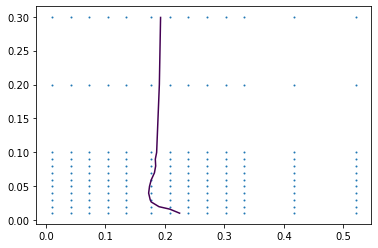

In [22]:
# linear contrast curve

levels = df_levels["val_xsec_crit_strip_w_planets_rel_to_strip_1"].values
cp23 = plt.contour(X, Y, cube_stat_avg, levels = levels)
plt.scatter(df["dist_asec"],df["comp_ampl"], s=1)

In [33]:
# magnitude contrast curve

Y_mag = -2.5*np.log10(Y)
comp_ampl = -2.5*np.log10(df["comp_ampl"])

In [46]:
levels = df_levels["val_xsec_crit_strip_w_planets_rel_to_strip_1"].values
#cp3 = plt.contour(X, Y_mag, cube_stat_avg, alpha = 0.5)
cp4 = plt.contour(X, Y_mag, cube_stat_avg, levels = levels, linewidths=5, color="k")
#plt.scatter(df["dist_asec"],comp_ampl, s=1)
plt.gca().invert_yaxis()
plt.xlabel("R (arcsec)")
plt.ylabel("$\Delta$m")
plt.show()

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'color'
  This is separate from the ipykernel package so we can avoid doing imports until


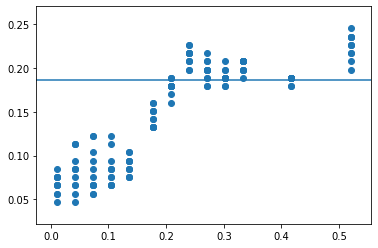

In [44]:
plt.scatter(contour_data["dist_asec"],contour_data["D_xsec_strip_w_planets_rel_to_strip_1"])
plt.axhline(y=df["val_xsec_crit_strip_w_planets_rel_to_strip_1"][0])
plt.show()

In [ ]:
## Now do the same comparison with the other strips that did not have
## the planets injected in them

In [ ]:
## Take the median across the slices

In [ ]:
## Interpolate to find companion amplitudes at the critical KS value-- that's the contrast curve!